Consider population.csv file that is in the categorical_cols folder and answer the following:
1. Separate categorical columns from numerical columns. Apply OneHot encoding to categorical features.
2. Identify the numerical features that are normally distributed using Shapiro Wilk's test and apply standard scaler on the features that are normally distributed and min-max on the non-normal numerical features.
3. Then use preprocessor and makepipeline (or pipeline) to automatically apply the transformations and logistic regression and make prediction. Print confusion matrix, accuracy score and AUC.
Use the Markdown feature in the notebook to explain the steps.
 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.compose import make_column_selector as col_selector

from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv("population.csv")

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Job Type          32561 non-null  object
 2   Final Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Job Title         32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital Loss      32561 non-null  int64 
 12  Hours per week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.head(10)

,Age,Job Type,Final Weight,Education,Education Number,Marital Status,Job Title,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
categorical_features = []
numeric_normal_features = []
numeric_non_normal_features = []
i=0

for col in df.columns:
       i=i+1
       vcount = len(df[col].value_counts() )
       dtype = df[col].dtype

       if dtype == 'object':
              categorical_features.append(col)
              print( f"[{i}] Cat col: {col} unique: {vcount}" )
       else:
              shapiro_col = stats.shapiro(df[col]).pvalue

              
              if(shapiro_col > 0.05):
                     numeric_normal_features.append(col)
                     print( f"[{i}] NORMAL Col: {col} unique: {vcount}, shapiro: {shapiro_col:.5f}")
              else:
                     numeric_non_normal_features.append(col)
                     print( f"[{i}] Non-Normal Col: {col} unique: {vcount} shapiro: {shapiro_col:.5f}")

                 

[1] Non-Normal Col: Age unique: 73 shapiro: 0.00000
[2] Cat col: Job Type unique: 9
[3] Non-Normal Col: Final Weight unique: 21648 shapiro: 0.00000
[4] Cat col: Education unique: 16
[5] Non-Normal Col: Education Number unique: 16 shapiro: 0.00000
[6] Cat col: Marital Status unique: 7
[7] Cat col: Job Title unique: 15
[8] Cat col: Relationship unique: 6
[9] Cat col: Race unique: 5
[10] Cat col: Gender unique: 2
[11] Non-Normal Col: Capital Gain unique: 119 shapiro: 0.00000
[12] Non-Normal Col: Capital Loss unique: 92 shapiro: 0.00000
[13] Non-Normal Col: Hours per week unique: 94 shapiro: 0.00000
[14] Cat col: Country unique: 42
[15] Cat col: Income unique: 2


/Users/eugenemesgar/anaconda3/envs/dev/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/eugenemesgar/anaconda3/envs/dev/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/eugenemesgar/anaconda3/envs/dev/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/eugenemesgar/anaconda3/envs/dev/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/eugenemesgar/anaconda3/envs/dev/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate 

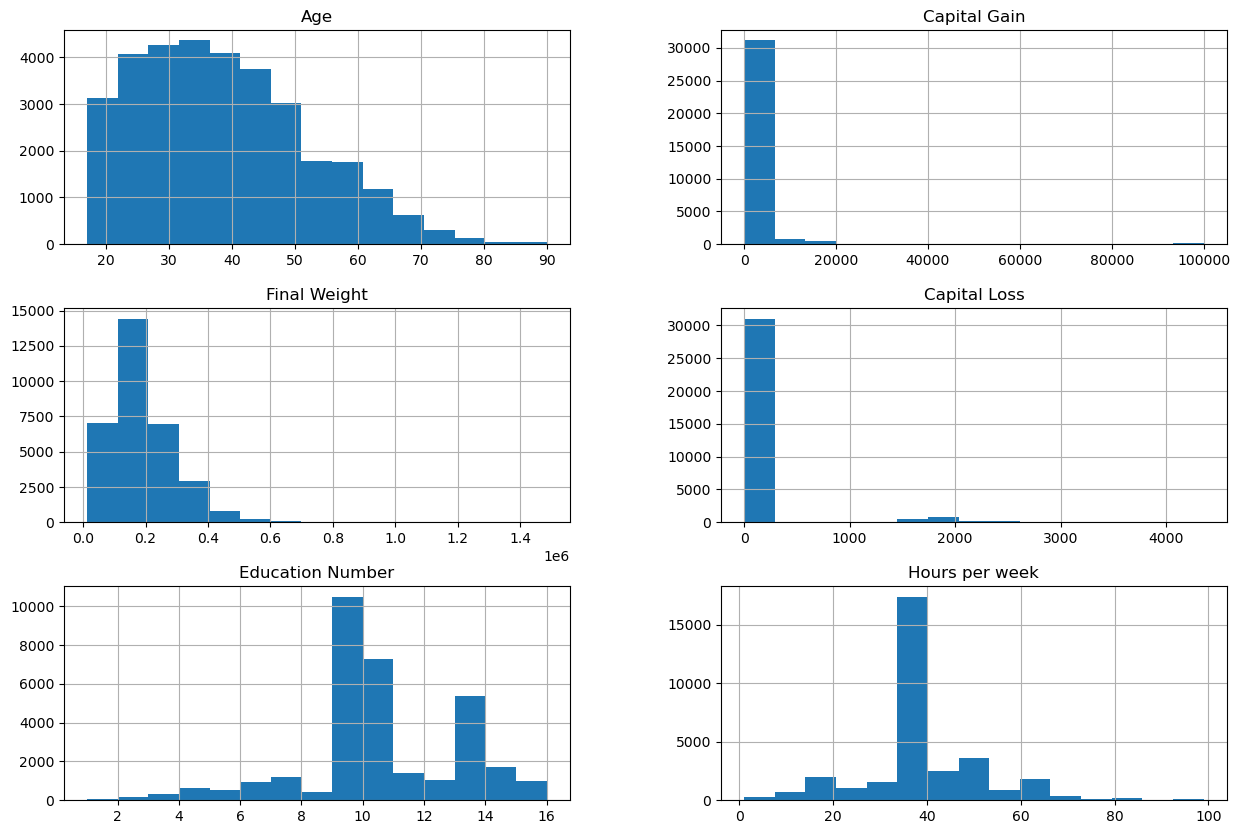

In [6]:
import matplotlib.pyplot as plt


variables= numeric_non_normal_features + numeric_normal_features

n_cols=2
n_rows= len(variables) // n_cols 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15,10))

for i, var_name in enumerate(variables):

    row = i % n_rows
    col = i // n_rows
    df[var_name].to_frame().hist(bins=15,ax=axes[row,col])



In [42]:
one_hot_encoder = OneHotEncoder()
minmax_encoder = MinMaxScaler()
standard_scalar = StandardScaler()


df_y = df["Income"]

df_minmax = pd.DataFrame(minmax_encoder.fit_transform(df[numeric_non_normal_features]), columns=numeric_non_normal_features)
df_standard = pd.DataFrame() if len(numeric_normal_features) == 0 else pd.DataFrame(standard_scalar.fit_transform(df[numeric_normal_features]), columns=numeric_normal_features)
df_onehot = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_features]).todense())

df_x = pd.concat([df_minmax, df_standard, df_onehot], axis=1)

df_x.head(100)

,Age,Final Weight,Education Number,Capital Gain,Capital Loss,Hours per week,0,1,2,3,...,94,95,96,97,98,99,100,101,102,103
0,0.301370,0.044302,0.800000,0.02174,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.452055,0.048238,0.800000,0.00000,0.000000,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.287671,0.138113,0.533333,0.00000,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.493151,0.151068,0.400000,0.00000,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.150685,0.221488,0.800000,0.00000,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.164384,0.070157,0.600000,0.00000,0.000000,0.500000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
96,0.424658,0.121563,1.000000,0.00000,0.436639,0.602041,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
97,0.273973,0.129310,0.600000,0.00000,0.000000,0.479592,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
98,0.424658,0.107856,0.733333,0.00000,0.000000,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df["Job Type"] = df["Job Type"].str.replace("?", "Other")
df["Country"] = df["Country"].str.replace("?", "Other")
df["Job Title"] = df["Job Title"].str.replace("?", "Other")

#print(df["Job Type"].unique())

In [7]:

df1 = df.copy(deep=True)


### Creating categorical_cols and int_cols objects

We use col_selector to do this. 
We also create categorical_features and numerical_features.

In [8]:
# categorical_cols_obj is a categorical object
categorical_cols_obj = col_selector(dtype_include=object)
print(type(categorical_cols_obj))

# categorical_features is a list of  column names of features with catergorical data
categorical_features = categorical_cols_obj(df)
print(type(categorical_features))

# numeric_features is a list of column names of features with numeric data
int_cols_obj = col_selector(dtype_include="int64")
numeric_features = int_cols_obj(df)

print(categorical_features)
print(numeric_features)

<class 'sklearn.compose._column_transformer.make_column_selector'>
<class 'list'>
['Job Type', 'Education', 'Marital Status', 'Job Title', 'Relationship', 'Race', 'Gender', 'Country']
['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per week']


### Creating data frame with categorical_features

Creating an OrdinalEncoder object and performing a fit_transform on the df_cat dataframe.

In the below example, we are not scaling columns with numeric_features. 

We are performing hstack to put encoded categorical dataframe with the numeric dataframe.

Since our target variable is categorical, we perform LabelEncoder on this. 

In [9]:
df_cat = df[categorical_features]
ob_encoded = preprocessing.OrdinalEncoder()
cat_encoded = ob_encoded.fit_transform(df_cat)

x = np.hstack([cat_encoded, np.array(df[numeric_features])])
print(x.shape)

yb = preprocessing.LabelEncoder()
y = yb.fit_transform(dfy)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

(32561, 14)


### Pandas cat.codes

Using Pandas cat.codes for Catgeorical feature conversion. 
Then Using StandardScaler for standarizing the numeric features.

In [10]:
"""
Recall - we already have categorical features and numeric_features from the previous cell.
Here it is again.


categorical_cols_obj = col_selector(dtype_include=object)
print(type(categorical_cols_obj))
categorical_features = categorical_cols_obj(df)
print(type(categorical_features))

int_cols_obj = col_selector(dtype_include="int64")
numeric_features = int_cols_obj(df)

print(categorical_features)
print(numeric_features)

"""


for i in range(len(categorical_features)):
    df1[categorical_features[i]] = df1[categorical_features[i]].astype('category')
    df1[categorical_features[i]] = df1[categorical_features[i]].cat.codes


sc = StandardScaler()

x = np.hstack([df1[categorical_features], sc.fit_transform(df1[numeric_features])])

print(x.shape)


"""
Recall

our y is 

yb = preprocessing.LabelEncoder()
y = yb.fit_transform(dfy)
"""


x_train, x_test, y_train, y_test = train_test_split(
                                   x, y, test_size = 0.2, random_state=1)

clf = LogisticRegression(max_iter=500)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

(32561, 14)
Accuracy: 0.8277291570704745


### Using Standard Scaler and make_pipeline

Performing StandardScaler only on numeric columns and then using 
make_pipeline.

Syntax for make_pipeline(list of estimator objects, model)

The numeric columns in our dataset are:
'Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per week'

In [11]:
lst = ['Age', 'Final Weight', 'Education Number', 'Capital Gain', 
       'Capital Loss', 'Hours per week']

x_train, x_test, y_train, y_test = \
    train_test_split(df[lst], y, test_size = 0.2, random_state=1)


st = StandardScaler()

"""
Example of Pipeline. Here we have to give the name of the estimator as a string 
followed by the estimator. 
In make_pipeline, we can just provide the list of estimators. 


clf = Pipeline([('preprocessor', preprocessor),
                  ('classifier', LogisticRegression(max_iter=500))])
"""


mpipe = make_pipeline(st, LogisticRegression())

mpipe.fit(x_train, y_train)

ym_pred = mpipe.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, ym_pred))

Accuracy: 0.8182097343773991


### Column Transform  

#### Encoding using Oridnal and scaling the numeric columns

Performing StandardScaler and OrdinalEncoder 
on numeric columns and categorical columns respectively and 
then using make_pipeline.


In [12]:
np.random.seed(0)

X = df

preprocessor = ColumnTransformer(
               transformers=[
               ('num', StandardScaler(), numeric_features),
               ('cat', OrdinalEncoder(), categorical_features)])

#clf = Pipeline(steps=[('preprocessor', preprocessor),
#                      ('classifier', LogisticRegression())])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.818


### OneHotEncoder


Performing StandardScaler and OneHotEncoder 
on numeric columns and categorical columns respectively and 
then using make_pipeline.


In [13]:
np.random.seed(0)


X = df
print(X.shape)


preprocessor = ColumnTransformer(
               transformers=[
               ('num', StandardScaler(), numeric_features),
               ('cat', OneHotEncoder(), categorical_features)])


#clf = Pipeline(steps=[('preprocessor', preprocessor),
#                      ('classifier', LogisticRegression())])

clf = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

(32561, 14)
model score: 0.847
